In [20]:
import conda
import numpy as np 
import pandas as pd 
import re
import os
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob

from sklearn.cross_validation import train_test_split
from textblob.classifiers import NaiveBayesClassifier

from wordcloud import WordCloud
from PIL import Image




In [21]:
df = pd.read_csv('Tweets.csv')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 9 columns):
tweet_id          14640 non-null float64
airline           14640 non-null object
name              14640 non-null object
retweet_count     14640 non-null int64
text              14640 non-null object
tweet_coord       1019 non-null object
tweet_created     14640 non-null object
tweet_location    9907 non-null object
user_timezone     9820 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 1.0+ MB


In [12]:
df.shape

(14640, 9)

In [13]:
df.describe()

,tweet_id,retweet_count
count,1.464000e+04,14640.000000
mean,5.692184e+17,0.082650
std,7.791111e+14,0.745778
min,5.675883e+17,0.000000
25%,5.685592e+17,0.000000
50%,5.694779e+17,0.000000
75%,5.698905e+17,0.000000
max,5.703106e+17,44.000000


In [14]:
df.head()

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Virgin America,jnardino,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [15]:
#The number of tweets per airline
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America    504 
Name: airline, dtype: int64

In [16]:
#The percentage of tweets that each airline accounts in this dataset
(df[['airline', 'text']].groupby('airline').count()/len(df)).sort_values(by='text', ascending=False)

,text
airline,
United,0.261066
US Airways,0.198975
American,0.188456
Southwest,0.165301
Delta,0.151776
Virgin America,0.034426


Text(0.5, 1, 'Tweets Frequency by Airline')

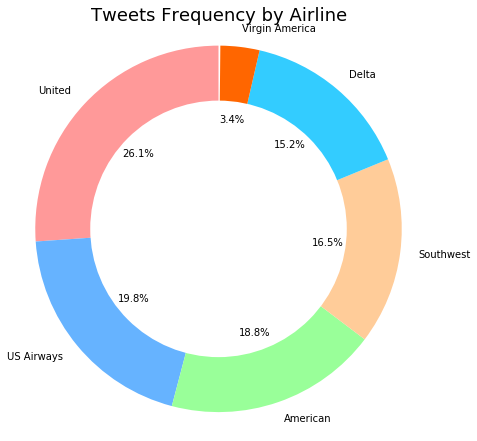

In [17]:
#Pie chart of tweets frequency for each airline
labels = ['United','US Airways','American','Southwest','Delta','Virgin America']
sizes = [0.261, 0.198, 0.188, 0.165, 0.152, 0.0344]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#33ccff', '#ff6600']
fig1, ax1 = plt.subplots(figsize=(6.5, 6))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title('Tweets Frequency by Airline', fontsize=18)

In [18]:
#Cleaning the data

In [24]:
username = '@[A-Za-z0-9]+'
url = 'https?://[^ ]+'
link = 'www.[^ ]+'
combined_p = '|'.join((username, url, link))
neg_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg = re.compile('\b(' + '|'.join(neg_dic.keys()) + ')\b')
tok = WordPunctTokenizer()

def tweet_cleaner(text):
    stripped = re.sub(combined_p, '', text)
    lower_case = stripped.lower()
    neg_handled = neg.sub(lambda x: neg_dic[x.group()], lower_case)
    letters = re.sub("[^a-zA-Z]", " ", neg_handled)
    words = [x for x in tok.tokenize(letters) if len(x) > 1]
    drop_stopwords = [x for x in words if x not in stopwords.words('english')]
    return (" ".join(drop_stopwords)).strip()

In [25]:
clean_tweets = []
for tweet in df.text:
    clean_tweets.append(tweet_cleaner(tweet))
df['clean_text'] = pd.DataFrame(clean_tweets)

In [31]:
df.head()

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added commercials experience tacky
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip
3,5.703010e+17,Virgin America,jnardino,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainment guests faces amp little recourse
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing


In [32]:
#Sentiment Analysis using TextBlob

In [ ]:
polarity = []
for tweet in clean_tweets:
    print(tweet)
    analysis = TextBlob(tweet)
    print(analysis.sentiment)
    polarity.append(analysis.sentiment.polarity)

In [ ]:
df['polarity'] = pd.DataFrame(polarity)
df['sentiment'] = np.where(df['polarity'] < 0.0, 1, 0)


In [ ]:
sns.countplot(x="variable", hue="value", data=pd.melt(df[['sentiment']]))
plt.title('The Sentiment', fontsize=18)
plt.show()

In [6]:
#using world cloud we will create tree word cloud using cleaned text in the first word cloud, the positive words based on our own sentiment analysis for the second word cloud, and the negative words based on our own sentiment analysis for the third word cloud

In [ ]:
wc_string = df['clean_text'].str.cat(sep=' ')

In [ ]:
wc = WordCloud(width=1600, height=800,background_color="white", max_words=2000).generate(wc_string)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('All Words from The Cleaned Text', fontsize=18)
plt.show()

In [ ]:
pos_string = df[df.sentiment == 0]['clean_text'].str.cat(sep=' ')

In [ ]:
twitter_mask = np.array(Image.open("social-twitter-bird-symbol_318-27588.jpg"))
wc = WordCloud(width=1600, height=800,background_color="white", colormap="Blues",mask=twitter_mask).generate(pos_string)
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Positive Words from The Cleaned Text', fontsize=18)
plt.show()

In [ ]:
neg_string = df[df.sentiment == 1]['clean_text'].str.cat(sep=' ')

In [ ]:
twitter_mask = np.array(Image.open("social-twitter-bird-symbol_318-27588.jpg"))
wc = WordCloud(width=1600, height=800,background_color="white", colormap="Reds",mask=twitter_mask).generate(neg_string)
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Negative Words from The Cleaned Text', fontsize=18)
plt.show()